In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data Preparation

## 1. Import the dataset

In [4]:
df=pd.read_csv("Customer Service_Requests_from_2010_to_Present.csv",dtype={48: 'str', 49: 'str'}) 

In [5]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


## 2. Provide your insight on the information and details that the provided dataset carries.

In [9]:
#Displaying all the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

## 3. Convert the columns "Created Date" and "Closed Date" to datetime datatype and create a new column "Request_Closing_Time" as the time elapsed between request creation and request closing.


In [13]:
# Converting the Created Date into datetime format
df["Created Date"]=pd.to_datetime(df["Created Date"])
df

C:\Users\hp\AppData\Local\Temp\ipykernel_22424\369019029.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Created Date"]=pd.to_datetime(df["Created Date"])


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:28,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,2015-03-29 00:33:03,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,2015-03-29 00:33:02,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [15]:
# Converting the Closed Date into datetime format
df["Closed Date"]=pd.to_datetime(df["Closed Date"])
df

C:\Users\hp\AppData\Local\Temp\ipykernel_22424\2533736293.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Closed Date"]=pd.to_datetime(df["Closed Date"])


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [17]:
# Adding a new column Request_Closing_Time as it is the time elapsed of Created Date and Closed Date
df["Request_Closing_Time"]=df["Closed Date"] - df["Created Date"]
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:33


## 4. Write a python program to drop irrelevant columns listed below.

In [21]:
#Dropping the irrelevant columns
df.drop(columns= ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
                  'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name', 'School Number',
                  'School Region','School Code','School Phone Number','School Address','School City','School State','School Zip',
                  'School Not Found','School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough','Taxi Pick Up Location',
                  'Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction',
                  'Ferry Terminal Name','Landmark','X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date',
                  'Community Board','Facility Type','Location'], axis = 1, inplace=True)

In [22]:
df

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,NaN,Open,Your complaint has been forwarded to the New Y...,Unspecified,NaN,NaN,NaT
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087,0 days 02:00:31
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234,0 days 03:07:17
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587,0 days 04:05:33


## 5. Write a python program to remove the NaN missing values from updated dataframe.

In [25]:
# Removing the NaN(missing values)
df.dropna(inplace=True)
df


,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,2015-03-29 00:34:32,2015-03-29 01:13:01,NYPD,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,NEW YORK,Closed,The Police Department responded to the complai...,MANHATTAN,40.716053,-73.991378,0 days 00:38:29
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087,0 days 02:00:31
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234,0 days 03:07:17
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587,0 days 04:05:33


In [27]:
# Checking the missing values
df.isna()


,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300694,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300695,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300696,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## 6. Write a python program to see the unique values from all the columns in the dataframe.

In [31]:
 #Displaying the number of unique values of all the presented columns
df[['Unique Key','Created Date', 'Closed Date','Agency', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
'City', 'Status', 'Resolution Description', 'Borough', 'Latitude', 'Longitude','Request_Closing_Time']].nunique()


Unique Key                291107
Created Date              251970
Closed Date               231991
Agency                         1
Complaint Type                15
Descriptor                    41
Location Type                 14
Incident Zip                 200
City                          53
Status                         1
Resolution Description        12
Borough                        5
Latitude                  123013
Longitude                 123112
Request_Closing_Time       47134
dtype: int64

# Data Analysis

## 1. Write a Python program to show summary statistics of sum, mean, standard deviation, skewness and kurtosis of the data frame.

In [35]:
# Summary statistics for each column
df.describe()

,Unique Key,Created Date,Closed Date,Incident Zip,Latitude,Longitude,Request_Closing_Time
count,2.911070e+05,291107,291107,291107.000000,291107.000000,291107.000000,291107
mean,3.130158e+07,2015-08-14 11:25:43.378747648,2015-08-14 15:44:15.511413248,10857.977349,40.725681,-73.925035,0 days 04:18:32.132665995
min,3.027948e+07,2015-03-29 00:33:01,2015-03-29 00:57:23,83.000000,40.499135,-74.254937,0 days 00:01:00
25%,3.079934e+07,2015-06-08 15:38:00,2015-06-08 21:25:00,10314.000000,40.668926,-73.970957,0 days 01:16:30
50%,3.130675e+07,2015-08-13 22:57:41,2015-08-14 02:50:57,11209.000000,40.717782,-73.930774,0 days 02:42:38
75%,3.179091e+07,2015-10-19 15:03:16.500000,2015-10-19 20:58:35.500000,11238.000000,40.782973,-73.875788,0 days 05:20:24
max,3.231065e+07,2015-12-31 23:59:45,2016-01-03 16:22:00,11697.000000,40.912869,-73.700760,24 days 16:52:22
std,5.753777e+05,NaN,NaN,580.280774,0.082411,0.078654,0 days 06:03:45.509089128


In [37]:
# Skewness of the 4 columns 
df[['Unique Key', 'Incident Zip', 'Latitude', 'Longitude']].skew()

Unique Key      0.016898
Incident Zip   -2.553956
Latitude        0.123114
Longitude      -0.312739
dtype: float64

<Axes: >

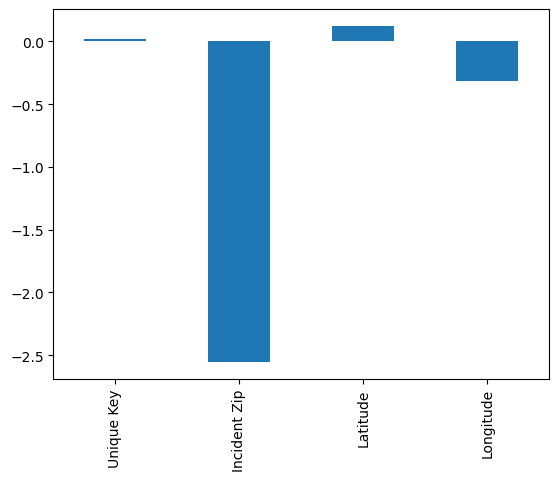

In [39]:
df[['Unique Key', 'Incident Zip', 'Latitude', 'Longitude']].skew().plot(kind='bar')

In [42]:
# Kurtosis of 4 columns
df[['Unique Key', 'Incident Zip', 'Latitude', 'Longitude']].kurt()

Unique Key      -1.176593
Incident Zip    37.827777
Latitude        -0.734818
Longitude        1.455600
dtype: float64

<Axes: >

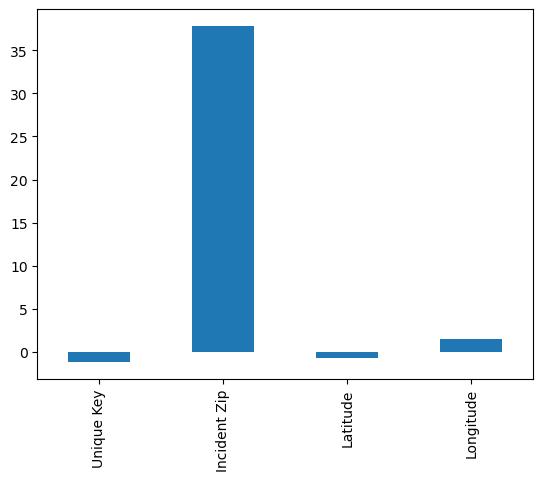

In [43]:
df[['Unique Key', 'Incident Zip', 'Latitude', 'Longitude']].kurt().plot(kind='bar')

In [45]:
# Sum of the 4 columns
df[['Unique Key', 'Incident Zip', 'Latitude', 'Longitude','Request_Closing_Time']].sum()

Unique Key                    9112107955295
Incident Zip                   3160833212.0
Latitude                    11855530.758778
Longitude                  -21520095.167682
Request_Closing_Time    52264 days 22:26:44
dtype: object

## 2. Write a Python program to calculate and show correlation of all variables. 	

In [49]:
# Correlation of all the variables
df.select_dtypes(include=['number']).corr()

,Unique Key,Incident Zip,Latitude,Longitude,Request_Closing_Time
Unique Key,1.000000,0.025492,-0.032613,-0.008621,0.053126
Incident Zip,0.025492,1.000000,-0.499081,0.385934,0.057182
Latitude,-0.032613,-0.499081,1.000000,0.368819,0.024497
Longitude,-0.008621,0.385934,0.368819,1.000000,0.109724
Request_Closing_Time,0.053126,0.057182,0.024497,0.109724,1.000000


# Data Exploration

## Insight 1: Distribution of Complaints by Borough


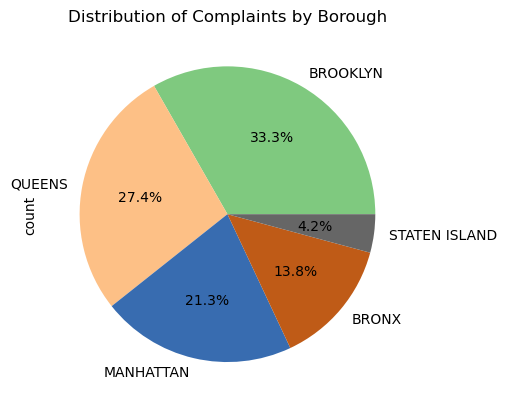

In [57]:

# Count number of complaints by borough
borough = df['Borough'].value_counts()

# Plot pie chart
borough.plot.pie( autopct='%1.1f%%',colormap='Accent') # Show percentage labels and use accent colromap
    


# Adding chart title and showing
plt.title("Distribution of Complaints by Borough")
plt.show()


## Insight 2: Average Request Closing Time by Complaint Type

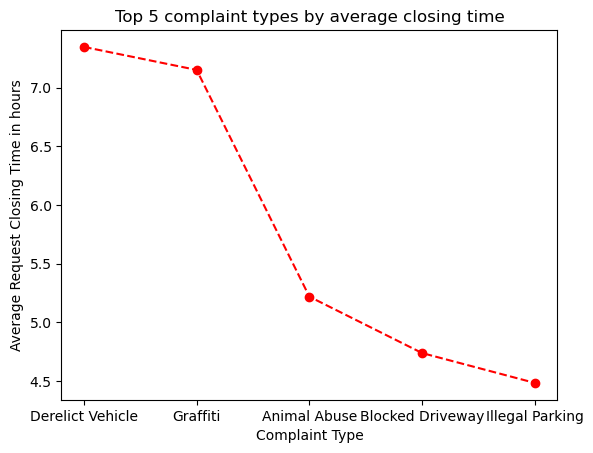

In [79]:
# calculate 'Request_Closing_Time' in hours
df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds()/3600

# calculate average closing time per complaint type
average_time = df.groupby('Complaint Type')['Request_Closing_Time'].mean().sort_values(ascending=False).head(5)

# plotting line graph
plt.plot(average_time.index,average_time.values, marker='o', color='red', ls='--')
plt.ylabel('Average Request Closing Time in hours')
plt.xlabel('Complaint Type')
plt.title('Top 5 complaint types by average closing time')
plt.show()


## Insight 3: Top five Complaint Types by Borough

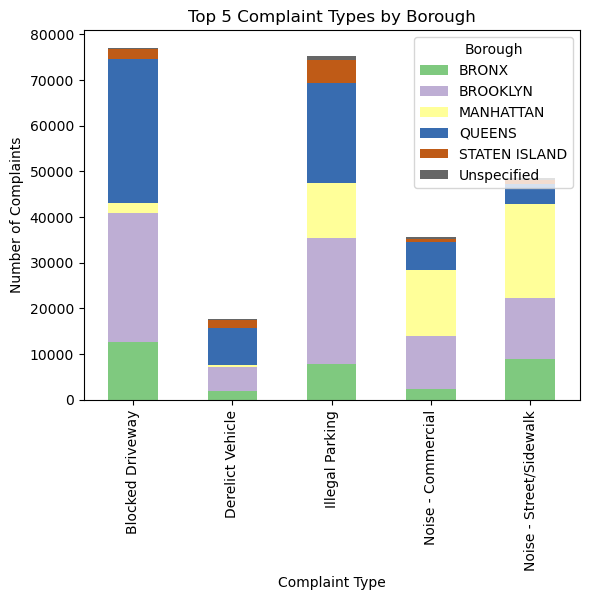

In [89]:
# Top 5 complaint types
top_complaints = df['Complaint Type'].value_counts().head(5).index

# Filter only the top complaints
top_complaints_df = df[df['Complaint Type'].isin(top_complaints)]

# Pivot table that count complaints by borough
pivot = top_complaints_df.pivot_table(index='Complaint Type',columns='Borough', aggfunc='size', fill_value=0)

pivot.plot(kind='bar', stacked=True, colormap='Accent') 
plt.title('Top 5 Complaint Types by Borough')
plt.ylabel('Number of Complaints')
plt.xlabel('Complaint Type')
plt.show()


## Insight 4: Distribution of Complaints by Time of Day

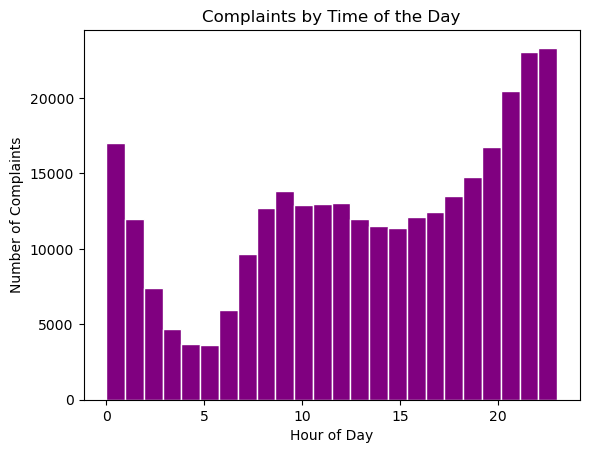

In [113]:
# extracting hour form the column Created Date
df['Created Date Hour'] = df['Created Date'].dt.hour

# plotting histogram
plt.hist(df['Created Date Hour'], bins=24, color='purple', edgecolor='white')

plt.title('Complaints by Time of the Day')

plt.ylabel('Number of Complaints')

plt.xlabel('Hour of Day')

plt.show()


# Statistical Testing

## ● Test 1:Whether the average response time across complaint types is similar or not.
## ●	State the Null Hypothesis (H0) and Alternate Hypothesis (H1).
## ●	Perform the statistical test and provide the p-value.
## ●	Interpret the results to accept or reject the Null Hypothesis.


In [102]:
from scipy.stats import f_oneway

# Null Hypothesis(h0): The average closing time is similar across all complaint types.
# Alternative Hypothesis(h1): The average closing time is not similar across all complaint types.

# calculating "Request_Closing_Time" in hours
df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds()/3600

# selecting the top 5 most frequent complaint types
top_complaints = df['Complaint Type'].value_counts().head(5).index

# creating a new dataframe with the top complaints
top_complaint_df = df[df['Complaint Type'].isin(top_complaints)]

# grouping the "Request_Closing_Time" values for each complaint type
closing_time_groups = [group['Request_Closing_Time'] for name, group in top_complaint_df.groupby('Complaint Type')]

# performing the f-test and list of groups into seperate arguments 
f_stat, p_val = f_oneway(*closing_time_groups)



C:\Users\hp\AppData\Local\Temp\ipykernel_3380\1033138061.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds()/3600


In [98]:
f_stat

1789.8124885501425

In [104]:
p_val

0.0

In [106]:
if p_val < 0.05:
    print("The null hypothesis is rejected. The average closing time is not similar across all complaint types.")
else:
    print("The null hypothesis is accepted. The average closing time is similar across all complaint types.")

The null hypothesis is rejected. The average closing time is not similar across all complaint types.



## ● Test 2: Whether the type of complaint or service requested and location are related.
## ● State the Null Hypothesis (H0) and Alternate Hypothesis (H1).
## ● Perform the statistical test and provide the p-value.
## ● Interpret the results to accept or reject the Null Hypothesis.

In [10]:
from scipy.stats import chi2_contingency

# Null Hypothesis(h0): complaint type and borough are not related
# Alternative Hypothesis(h1): complaint type and borough are related

# Create contingency table
pivot_table = df.pivot_table(index='Complaint Type', columns='Borough', aggfunc='size', fill_value=0)

# Chi-Square Test
chi2, p_val, dof, expected = chi2_contingency(pivot_table)

In [13]:
chi2

79641.55785644836

In [16]:
p_val

0.0

In [18]:
dof

115

In [20]:
expected

array([[8.12150397e-01, 1.96157607e+00, 1.31954985e+00, 1.60907622e+00,
        2.46286972e-01, 5.13605012e-02],
       [1.05281763e+03, 2.54285644e+03, 1.71057645e+03, 2.08589913e+03,
        3.19270012e+02, 6.65803298e+01],
       [1.35358399e-01, 3.26929344e-01, 2.19924975e-01, 2.68179369e-01,
        4.10478287e-02, 8.56008354e-03],
       [5.77980366e+01, 1.39598830e+02, 9.39079641e+01, 1.14512591e+02,
        1.75274229e+01, 3.65515567e+00],
       [1.04285525e+04, 2.51879444e+04, 1.69438997e+04, 2.06616113e+04,
        3.16248892e+03, 6.59503076e+02],
       [2.39828012e+03, 5.79253412e+03, 3.89663070e+03, 4.75160207e+03,
        7.27285429e+02, 1.51667560e+02],
       [3.87125022e+01, 9.35017925e+01, 6.28985427e+01, 7.66992996e+01,
        1.17396790e+01, 2.44818389e+00],
       [1.73258751e+02, 4.18469561e+02, 2.81503967e+02, 3.43269593e+02,
        5.25412208e+01, 1.09569069e+01],
       [2.70716799e-01, 6.53858689e-01, 4.39849949e-01, 5.36358739e-01,
        8.20956574e-02, 

In [22]:
if p_val < 0.05:
    print("The null hypothesis is rejected. Complaint Type and Borough are related.")
else:
    print("The null hypothesis is accepted. Complaint Type and Borough are not related.")

The null hypothesis is rejected. Complaint Type and Borough are related.
